In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [18]:
# 시각화 한국말 디스플레이
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['AppleGothic']

# Ensure minus sign is rendered correctly by using the default minus sign
plt.rcParams['axes.unicode_minus'] = False

In [60]:
df = pd.read_csv('./data/가공데이터/대여이력정보.csv', parse_dates=['대여일시'])
df

,자전거번호,대여일시,이용시간(분),이용거리(M),생년,이용자종류,대여대여소ID,반납대여소ID,나이(만)
0,SPB-43216,2022-07-01 00:00:16,23,3356.68,1985,내국인,ST-1964,ST-665,37
1,SPB-59945,2022-07-01 00:00:17,9,1360.00,2000,내국인,ST-1730,ST-2596,22
2,SPB-41020,2022-07-01 00:00:20,12,1848.00,1967,내국인,ST-1136,ST-1120,55
3,SPB-60168,2022-07-01 00:00:20,6,1510.00,1994,내국인,ST-1462,ST-1135,28
4,SPB-63298,2022-07-01 00:00:22,18,1700.00,1992,내국인,ST-3029,ST-639,30
...,...,...,...,...,...,...,...,...,...
24176794,SPB-66578,2023-12-31 23:59:16,49,2750.00,1978,내국인,ST-1269,ST-725,45
24176795,SPB-49435,2023-12-31 23:59:34,17,2379.94,1962,내국인,ST-1062,ST-2058,61
24176796,SPB-58442,2023-12-31 23:59:39,7,1058.43,2000,내국인,ST-2717,ST-1642,23
24176797,SPB-69332,2023-12-31 23:59:43,9,1840.00,2001,내국인,ST-1714,ST-828,22


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24176799 entries, 0 to 24176798
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   이용시간(분)  int64         
 3   이용거리(M)  float64       
 4   생년       int64         
 5   이용자종류    object        
 6   대여대여소ID  object        
 7   반납대여소ID  object        
 8   나이(만)    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.6+ GB


In [62]:
df_groupby = df.groupby(df['대여일시'].dt.date.rename('date'))['자전거번호'].count().reset_index()

In [63]:
# df_groupby = df.groupby([df['대여일시'].dt.year.rename('year'), df['대여일시'].dt.month.rename('month')])['자전거번호'].count().reset_index()

In [64]:
df_groupby

,date,자전거번호
0,2022-07-01,84993
1,2022-07-02,71449
2,2022-07-03,61857
3,2022-07-04,80528
4,2022-07-05,78514
...,...,...
363,2023-12-27,41371
364,2023-12-28,41461
365,2023-12-29,42549
366,2023-12-30,7824


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24176799 entries, 0 to 24176798
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   이용시간(분)  int64         
 3   이용거리(M)  float64       
 4   생년       int64         
 5   이용자종류    object        
 6   대여대여소ID  object        
 7   반납대여소ID  object        
 8   나이(만)    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.6+ GB


In [66]:
# # 다경님 코드
# # 시계열 분해 (additive 모델 사용)
# decomposition = seasonal_decompose(rental_merged['자전거번호'], model='additive', period=30)
# # 시각화
# plt.figure(figsize=(12, 8))
# # 원본 데이터
# plt.subplot(411)
# plt.plot(rental_merged['자전거번호'], label='Original')
# plt.legend(loc='upper left')
# # 추세(Trend)
# plt.subplot(412)
# plt.plot(decomposition.trend, label='Trend')
# plt.legend(loc='upper left')
# # 계절성(Seasonality)
# plt.subplot(413)
# plt.plot(decomposition.seasonal, label='Seasonality')
# plt.legend(loc='upper left')
# # 불규칙성(Residual)
# plt.subplot(414)
# plt.plot(decomposition.resid, label='Residuals')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

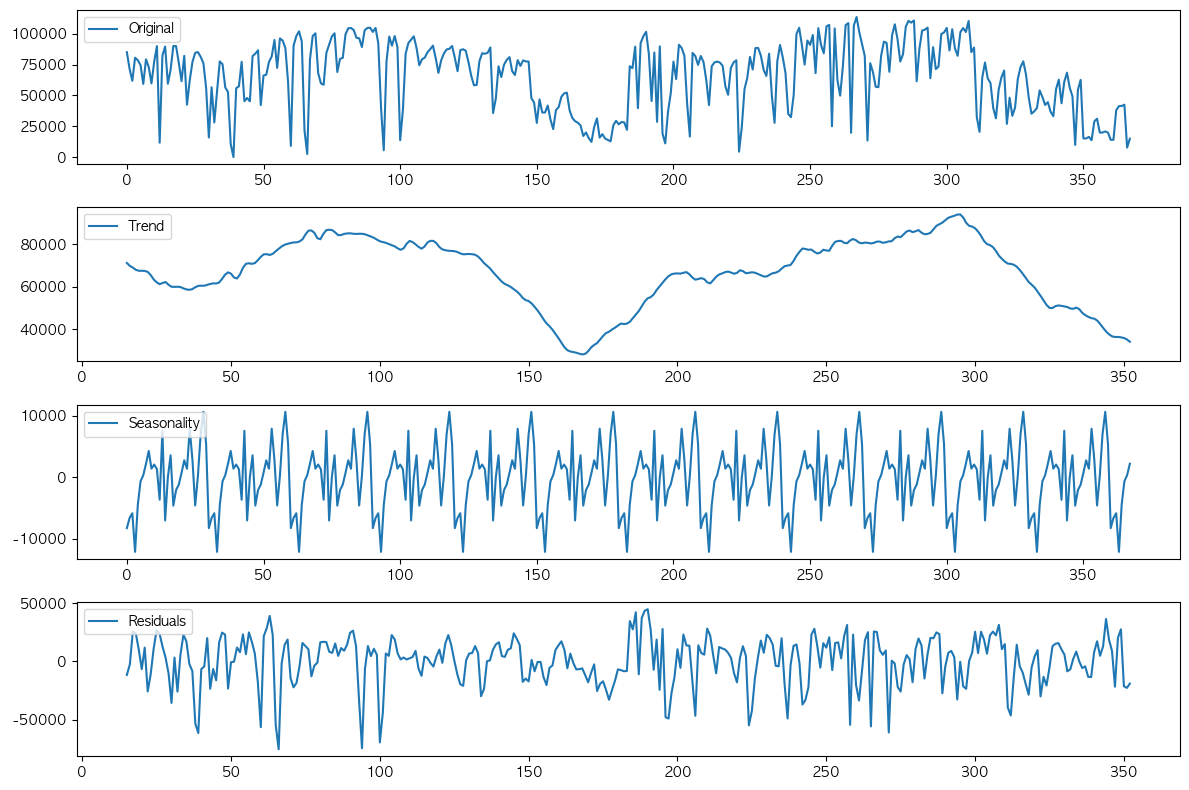

In [71]:
# import matplotlib.dates as mdates
# 시계열 분해 (additive 모델 사용)
df_dt_decomp = seasonal_decompose(df_groupby['자전거번호'], period=30)
# 시각화
plt.figure(figsize=(12, 8))
# 원본 데이터
plt.subplot(411)
plt.plot(df_dt_decomp.observed, label='Original')
plt.legend(loc='upper left')
# 추세(Trend)
plt.subplot(412)
plt.plot(df_dt_decomp.trend, label='Trend')
plt.legend(loc='upper left')
# 계절성(Seasonality)
plt.subplot(413)
plt.plot(df_dt_decomp.seasonal, label='Seasonality')
plt.legend(loc='upper left')
# 불규칙성(Residual)
plt.subplot(414)
plt.plot(df_dt_decomp.resid, label='Residuals')
plt.legend(loc='upper left')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
# # plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
# plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()